*Eduardus Tjitrahardja | @edutjie | 2022*

# Forward Propagation

## Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline

In [2]:
# Optional
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

## Loading Images

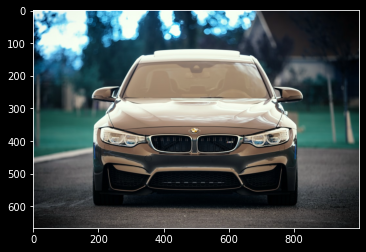

In [3]:
bgr_img = cv2.imread('images/car_image.jpeg')
plt.imshow(bgr_img)
plt.show()

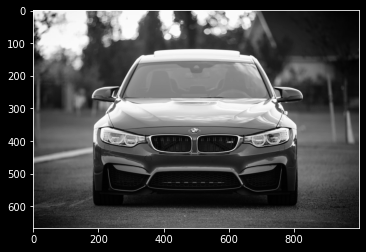

In [4]:
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype(np.float32) / 255
plt.imshow(gray_img, cmap='gray')
plt.show()

## Defining Filters

In [5]:
filter_vals = np.array([[-0, -1, 0],
                        [-1, 5, 1],
                        [0, -1, 0]])
print('Filters shape:', filter_vals.shape)

Filters shape: (3, 3)


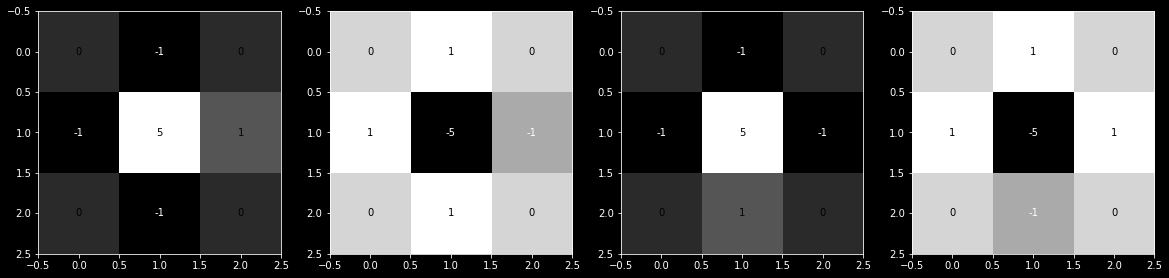

In [6]:
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = np.array([filter_1, filter_2, filter_3, filter_4])

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for i, filter in enumerate(filters):
    ax[i].imshow(filter, cmap="gray")
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax[i].annotate(
                str(filters[i][x][y]),
                xy=(y, x),
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if filters[i][x][y] < 0 else "black",
            )
plt.show()


## Defining Convolutional Layer

In [115]:
class Network(keras.layers.Layer):
    def __init__(self, filters):
        super(Network, self).__init__()
        k_height, k_width = filters.shape[1:]
        self.conv = keras.layers.Conv2D(
            4,
            kernel_size=(k_height, k_width),
            strides=(1, 1),
            data_format="channels_last",
            padding="valid",
            use_bias=False,
        )
        self.relu = keras.layers.ReLU()

    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = self.relu(conv_x)

        return conv_x, activated_x

In [116]:
model = Network(filters)
model

## Forwarding Propagation

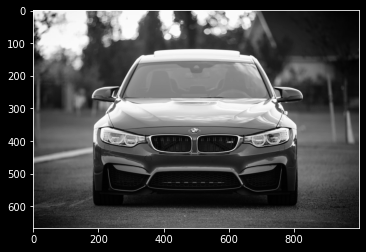

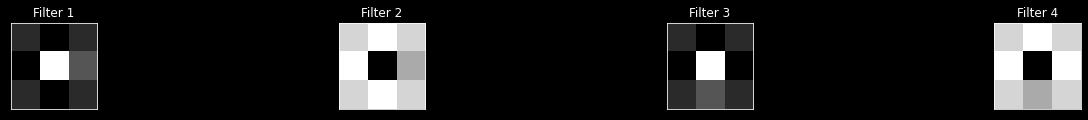

In [118]:
plt.imshow(gray_img, cmap='gray')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
  ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
  ax.imshow(filters[i], cmap='gray')
  ax.set_title('Filter %s' % str(i+1))

gray_img_keras = gray_img.reshape(-1, gray_img.shape[0], gray_img.shape[1], 1)

conv_layer, activated_layer = model.forward(gray_img_keras)

## Visualizing Output

In [117]:
def viz_layer(layer, n_filters=4):
  fig=plt.figure(figsize=(20, 20))

  for i in range (n_filters):
    ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(layer[0, :, :, i].numpy()), cmap='gray')
    ax.set_title('Output %s' % str(i+1))

### Before ReLU

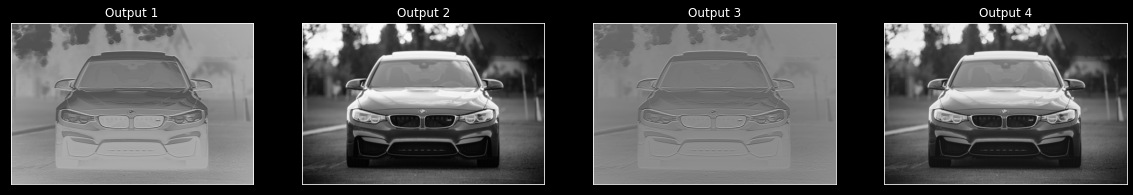

In [119]:
viz_layer(conv_layer)

### After ReLU

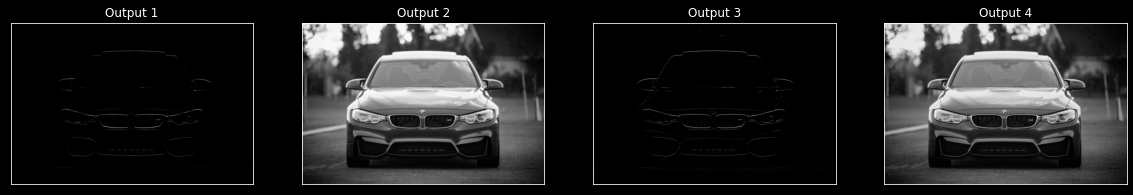

In [120]:
viz_layer(activated_layer)